In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LinearRegression:
A simple regression model that fits a straight line.
MinMaxScaler:
Scales features to a given range.
train_test_split:
Splits data into training and testing.
PCA (from sklearn.decomposition):
Principal Component Analysis: reduces dimensionality by transforming features into fewer uncorrelated components while preserving variance.

Helps with visualization, noise reduction, and avoiding overfitting.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv', index_col='Serial No.')

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## features (X) and target (y):

In [5]:
y = data['Chance of Admit ']
X = data.drop('Chance of Admit ', axis=1)


In [6]:
y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [7]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


applying PCA to reduce features to 2 principal components. A few important points:


In [8]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [9]:
print("Shape after PCA:", X_PCA.shape)

Shape after PCA: (500, 2)


converting the PCA output into a DataFrame with meaningful column names:

In [10]:
X_PCA = pd.DataFrame(X_PCA, columns=['PC1', 'PC2'])

In [11]:
X_PCA 

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Each point in the scatter plot represents one observation (row) from your dataset.

Its position is determined by its values on PC1 and PC2, not the original features.


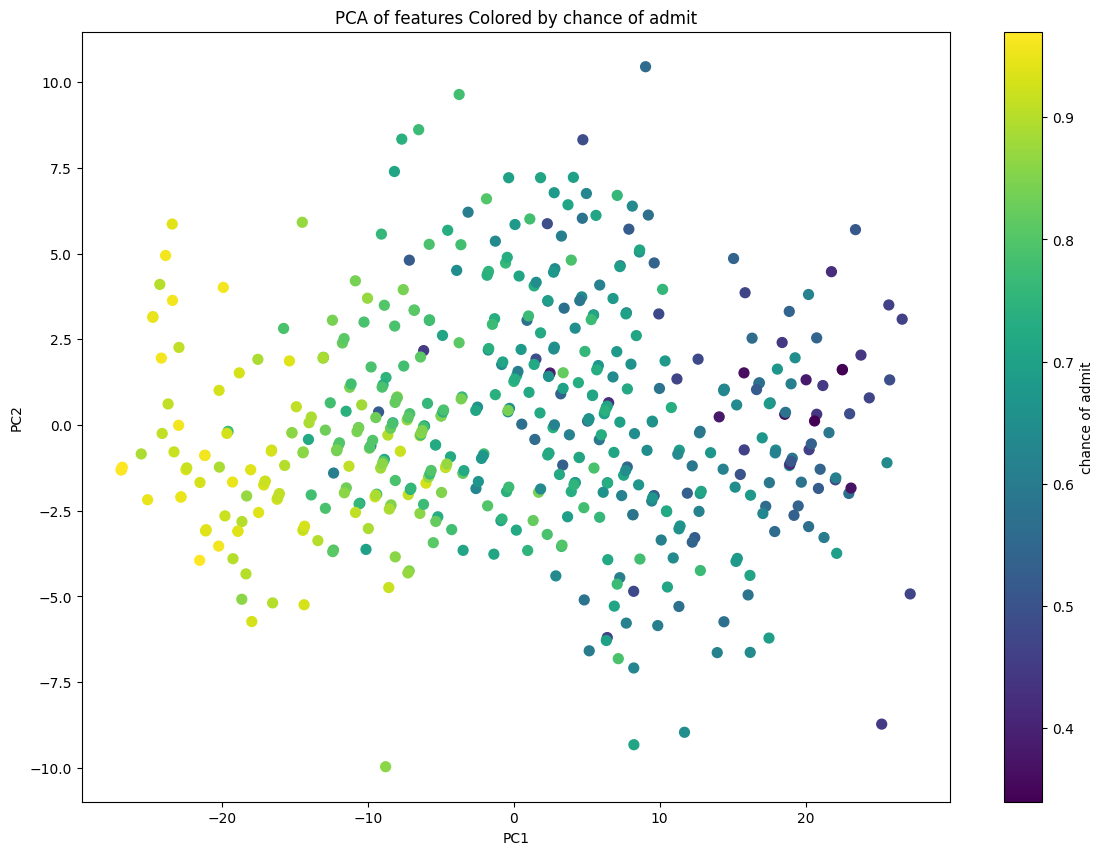

In [12]:
plt.figure(figsize=(14,10))
scatter = plt.scatter(X_PCA['PC1'], X_PCA['PC2'], c=y, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of features Colored by chance of admit')
plt.colorbar(scatter, label='chance of admit')
plt.show()

Finds the index of the observation with the maximum value of PC1.

Essentially, which row in your dataset has the largest projection along the first principal component.
Finds the index of the observation with the minimum value of PC1.

This is the row with the smallest projection along PC1.

In [13]:
PCA_max = np.argmax(X_PCA['PC1'])
PCA_min = np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

377
202


original feature values of the observation that has the maximum value along PC1:

In [14]:
X.iloc[PCA_max, :]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

original feature values of the observation that has the minimum value along PC1:

In [15]:
X.iloc[PCA_min, :]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

### training a Linear Regression model.

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model.score(X_test, y_test) gives the R² (coefficient of determination) of Linear Regression model on the test set.

In [20]:
r2 = model.score(X_test, y_test)
print(f'R2 on test set:{r2:.4f}')

R2 on test set:0.8347


In [21]:
pred = model.predict(X_test)

### Compare predictions vs actual values:

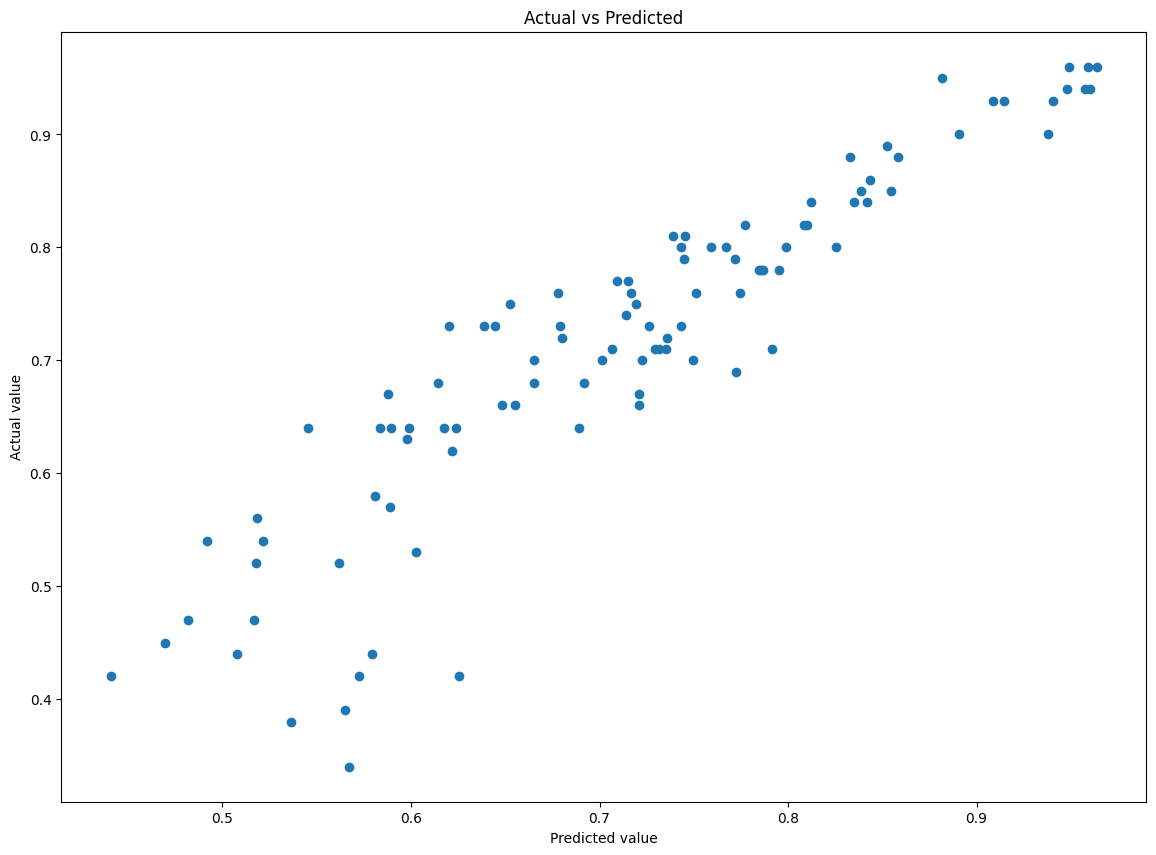

In [22]:
plt.figure(figsize=(14, 10))
plt.plot(pred, y_test, 'o')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Actual vs Predicted')
plt.show()

### Evaluate performance with metrics:

In [23]:
from sklearn.metrics import mean_squared_error, r2_score


helps see how close your predictions are to the real values.

In [24]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

MSE: 0.0036, R²: 0.8347


Points near 0 → predictions are accurate.

Points above 0 → model under-predicted the value.

Points below 0 → model over-predicted the value.

Ideally, residuals should be randomly scattered around 0, indicating a good fit and no systematic bias.

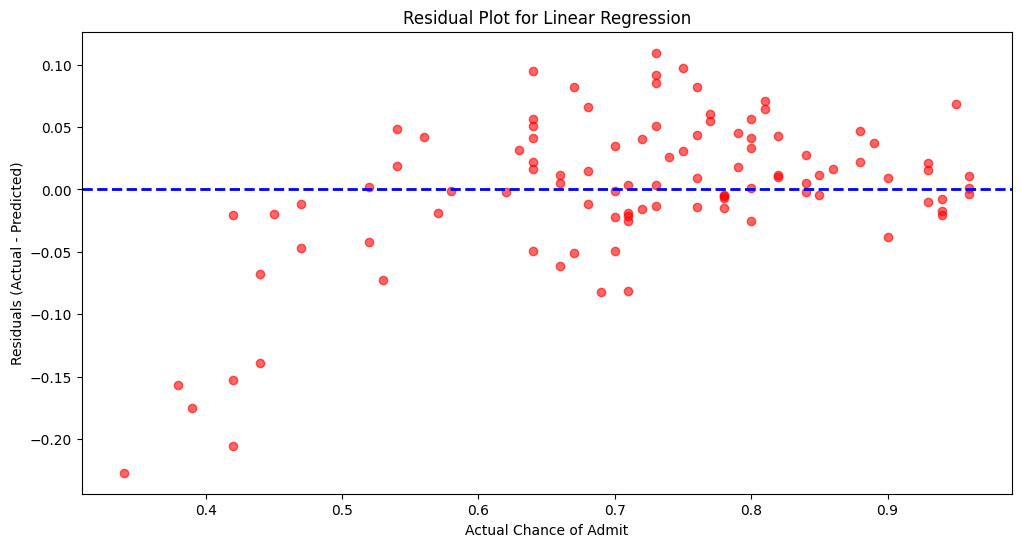

In [25]:
residuals = y_test - pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.6)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)  
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression")
plt.show()

Points on the diagonal line → perfect predictions.

Points above the line → model under-predicted the target.

Points below the line → model over-predicted the target.

The closer the scatter is to the diagonal, the better the model fits the data.

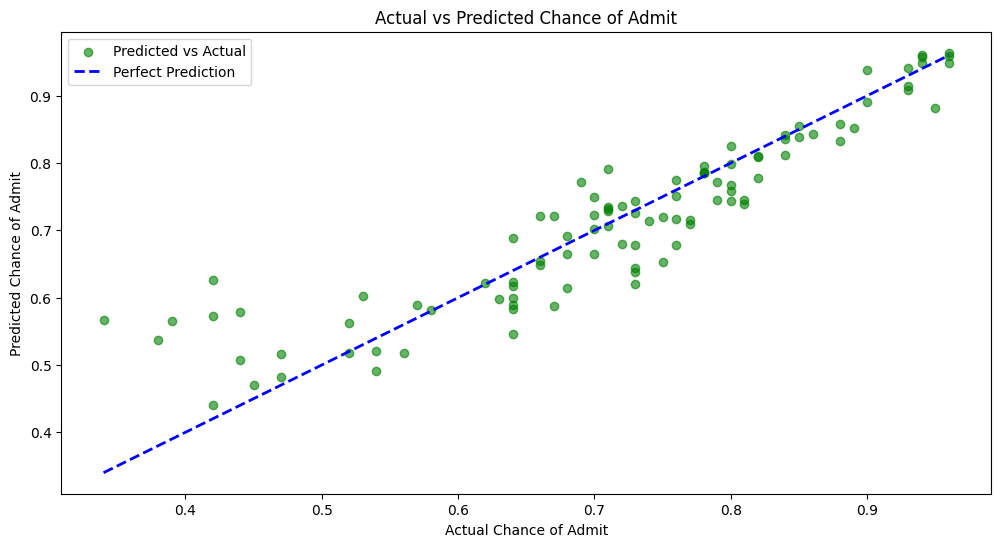

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, pred, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='blue', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.legend()
plt.show()

Darker/red points → larger prediction errors, model struggled here.

Lighter/yellow points → predictions close to actual values.

The diagonal line still represents perfect predictions.

This plot helps quickly identify areas where the model underperforms, which is useful for model diagnostics or feature engineering.

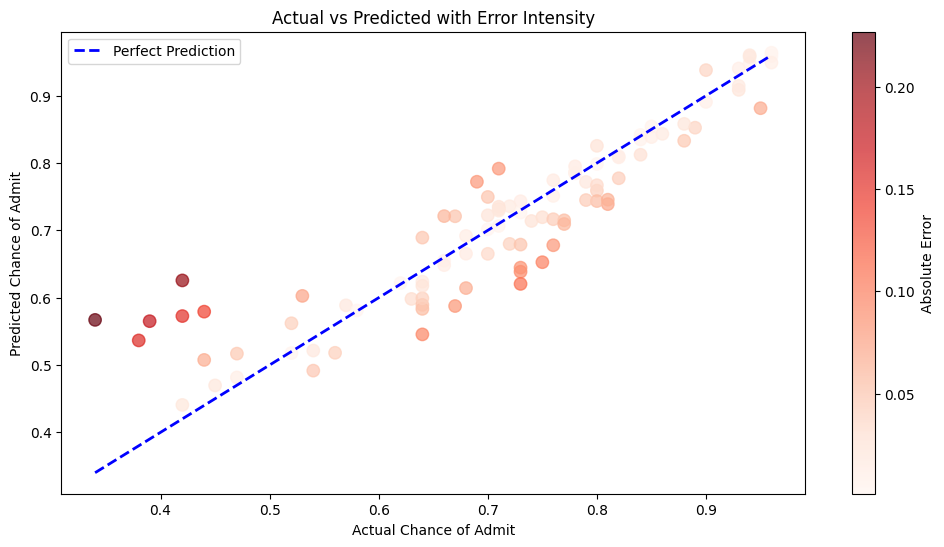

In [27]:
errors = np.abs(y_test - pred)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(y_test, pred, c=errors, cmap='Reds', alpha=0.7, s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='blue', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted with Error Intensity")
plt.colorbar(scatter, label='Absolute Error')
plt.legend()
plt.show()